# Описание набора данных

Данные описывают экономические условия в 48 городах мира в 1991 году. Данные были собраны отделом экономических исследований банка Union (Швейцария).

Признак  | Описание
-------------------|--------------------
City       | Название города
Work       | Взвешенное среднее числа рабочих часов, сосчитанное по 12 профессиям
Price       | Индекс цен 112 товаров и услуг, включая арендную плату за жилье (значение для Цюриха взято за 100%)
Salary       | Индекс заработной платы за час работы, сосчитанный по 12 профессиям после взятия налогов и вычетов (значение для Цюриха взято за 100%)


# Загрузка и предварительная обработка данных

Импортируем библиотеки

In [ ]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


Загрузим данные в датафрейм 

In [ ]:
df = pd.read_csv("Econom_Cities_data.csv", sep = ";", index_col = 0, header = 0, decimal = ",")
df

,Work,Price,Salary
City,,,
Amsterdam,1714,65.6,49.0
Athens,1792,53.8,30.4
Bogota,2152,37.9,11.5
Bombay,2052,30.3,5.3
Brussels,1708,73.8,50.5
Buenos_Aires,1971,56.1,12.5
Cairo,-9999,37.1,-9999.0
Caracas,2041,61.0,10.9
Chicago,1924,73.9,61.9


Окинем взглядом основные статистики, посчитанные по данному набору данных.

In [ ]:
df.describe()

,Work,Price,Salary
count,48.000000,48.000000,48.000000
mean,1384.958333,68.860417,-378.727083
std,2404.897007,21.784659,2027.338052
min,-9999.000000,30.300000,-9999.000000
25%,1740.750000,49.650000,12.250000
50%,1834.500000,70.500000,40.300000
75%,1972.750000,81.700000,58.700000
max,2375.000000,115.500000,100.000000


Видно, что в столбцах `Work` и `Salary` есть аномальные значения, равные $-9999$. Это типичные значения, возникающие в случаях, когда необходимо заполнить пропуски в данных. Города с такими значениями в соответствующих столбцах придется считать выбросами и исключить из рассмотрения, так как непонятно, имеем ли мы право каким-то простым и разумным образом заполнить эти пропуски.

Для того чтобы проверить, что мы ничего не упустили, давайте посмотрим на ящики с усами (boxplot).

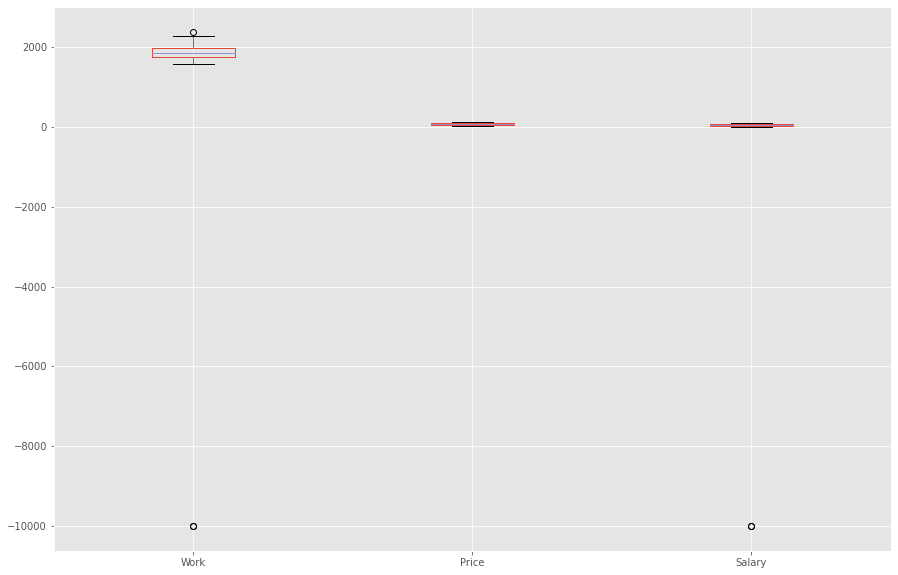

In [ ]:
df.boxplot(figsize=(15,10))

Удалим выбросы и посмотрим на то, что получилось.



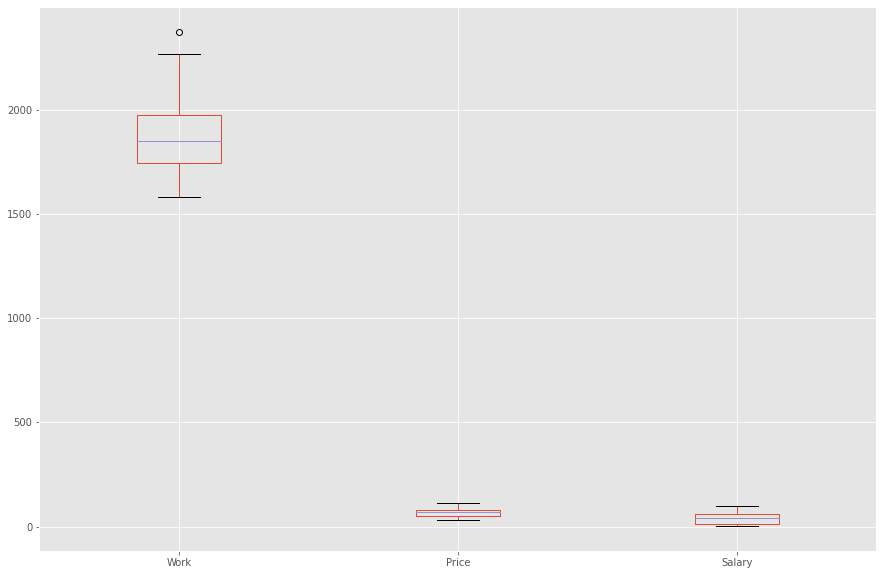

In [ ]:
clean_df = df[df['Work'] != -9999]
clean_df.boxplot(figsize=(15,10))

Видно, что выбросы удалены. Этот же график показывает, что рассматриваемые числовые величины имеют разный порядок, а значит, без сомнений, перед началом обработки их нужно стандартизировать. Будем стандартизировать с помощью StandartScaler().

In [ ]:
standard_scaler = StandardScaler()
standard_df = pd.DataFrame(data = standard_scaler.fit_transform(clean_df), index = clean_df.index, columns = clean_df.columns)
standard_df

,Work,Price,Salary
City,,,
Amsterdam,-0.962166,-0.212712,0.386095
Athens,-0.509827,-0.770489,-0.373488
Bogota,1.577891,-1.522069,-1.145323
Bombay,0.997969,-1.881316,-1.398517
Brussels,-0.996961,0.174896,0.447351
Buenos_Aires,0.528233,-0.661769,-1.104485
Caracas,0.934178,-0.430150,-1.169825
Chicago,0.255670,0.179623,0.912902
Copenhagen,-0.944768,1.002108,0.953740


Снова взглянем на boxplot, чтобы убедиться, что теперь визуально все неплохо.

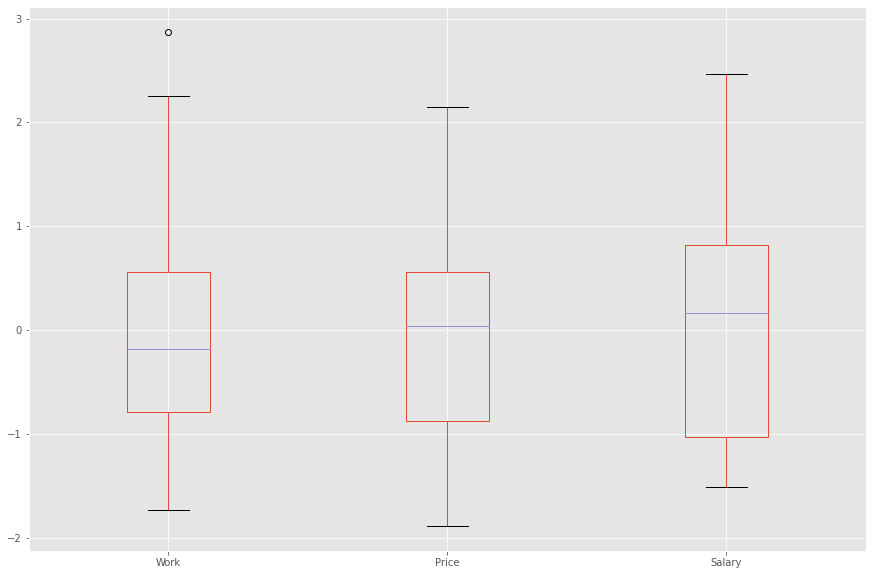

In [ ]:
standard_df.boxplot(figsize=(15,10))

Мы видим, что теперь все величины имеют одинаковый порядок. Есть, конечно, выбивающееся значение в `Work`, но оно не кажется аномальным.

Теперь данные подготовленны и можно идти дальше.

# Постановка задачи и построение модели

Наша задача — выяснить, могут ли предложенные данные быть разбиты каким-то образом на группы (кластеризованы), и, в случае утвердительного ответа,  определить смысл полученных групп.

Для проведения кластеризации будем использовать метод k-means. Попытаемся определить адекватное число кластеров (изучим диапазон от 1 до 10).

In [ ]:
final_df = clean_df.copy()

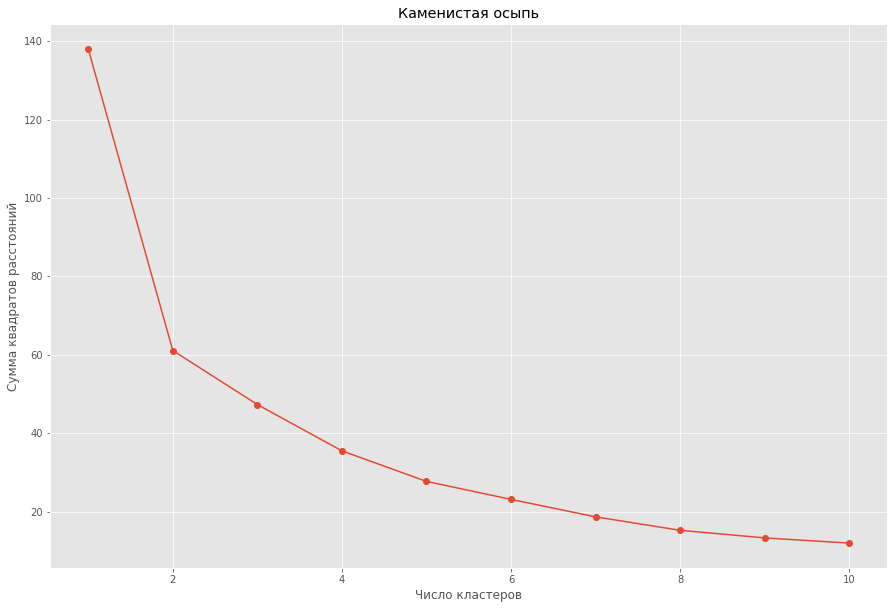

In [ ]:
K = range(1, 11)
models = [KMeans(n_clusters = k, random_state = 111, n_init = 100, max_iter = 10000).fit(standard_df) for k in K]
dist = [model.inertia_ for model in models]

plt.figure(figsize=(15,10))
plt.plot(K, dist, marker='o')
plt.xlabel('Число кластеров')
plt.ylabel('Сумма квадратов расстояний')
plt.title('Каменистая осыпь')
plt.show()

По графику видно, что имеет смысл рассмотреть диапазон от 4 до 8 кластеров. Далее излом не такой большой, а значит большее количество кластеров можно не брать в расчет.

Произведем кластеризацию для каждого случая и визуализируем полученные результаты.

                   Work      Price     Salary
3_clusters                                   
0           1789.240000  84.972000  59.032000
1           1855.454545  50.781818  16.590909
2           2133.500000  54.170000  16.080000


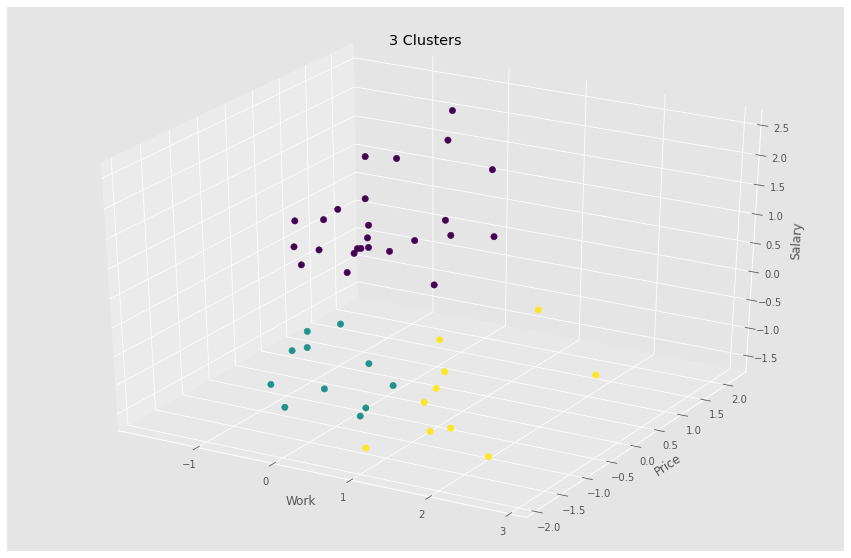

                   Work       Price     Salary
4_clusters                                    
0           1780.500000  108.550000  71.300000
1           1855.454545   50.781818  16.590909
2           1792.000000   77.526316  55.157895
3           2133.500000   54.170000  16.080000


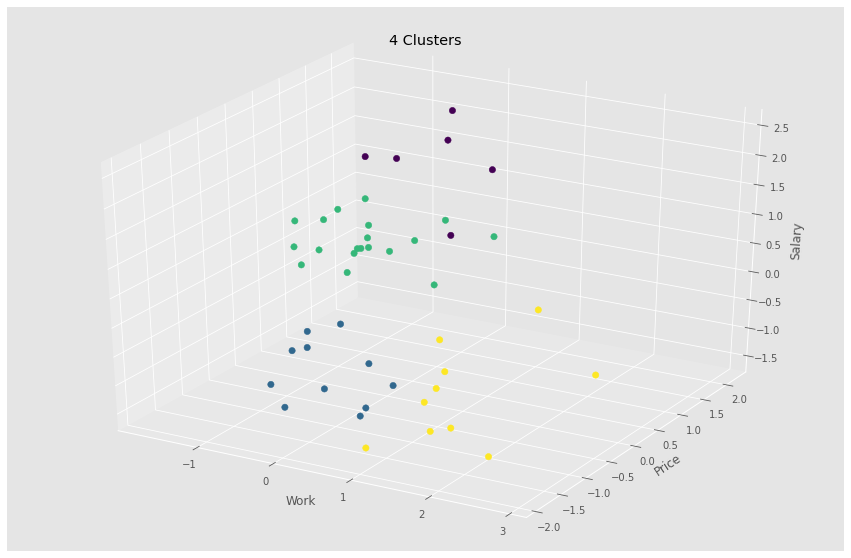

                   Work       Price     Salary
5_clusters                                    
0           1732.000000   78.135714  53.614286
1           1855.454545   50.781818  16.590909
2           2146.875000   48.762500  12.412500
3           1780.500000  108.550000  71.300000
4           1994.285714   75.814286  51.271429


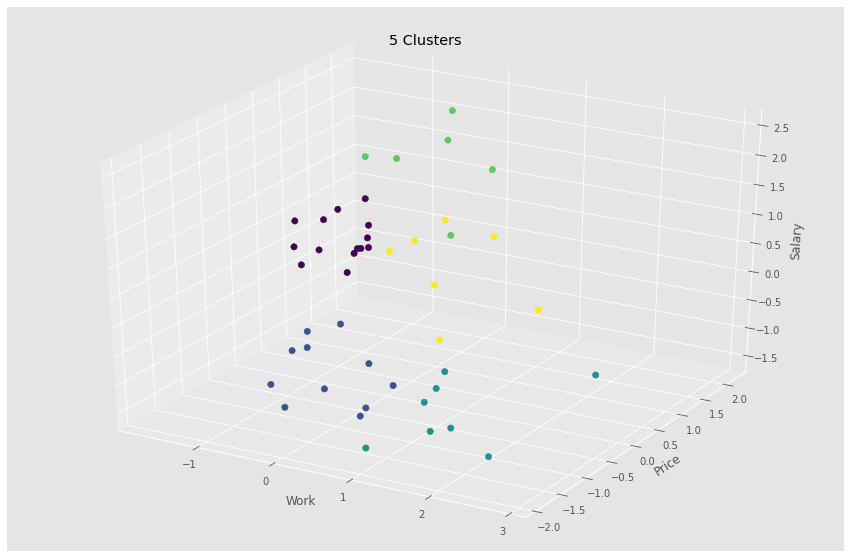

                   Work       Price     Salary
6_clusters                                    
0           1732.000000   78.135714  53.614286
1           2005.111111   52.688889  13.455556
2           1798.857143   50.942857  19.214286
3           1990.833333   77.233333  55.316667
4           1780.500000  108.550000  71.300000
5           2240.500000   46.300000  13.300000


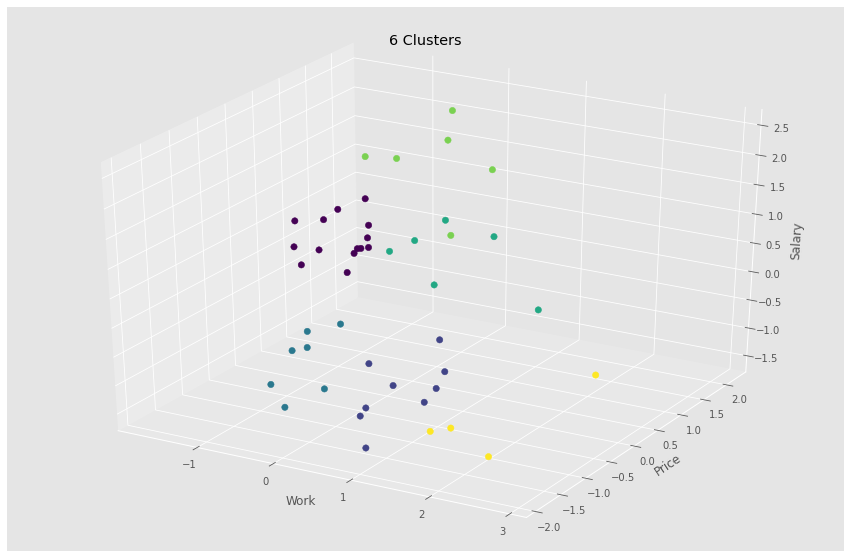

                   Work       Price     Salary
7_clusters                                    
0           1733.750000  113.850000  59.375000
1           1798.857143   50.942857  19.214286
2           1990.833333   77.233333  55.316667
3           1999.250000   55.487500  14.475000
4           1732.000000   78.135714  53.614286
5           2202.800000   43.100000  11.700000
6           1874.000000   97.950000  95.150000


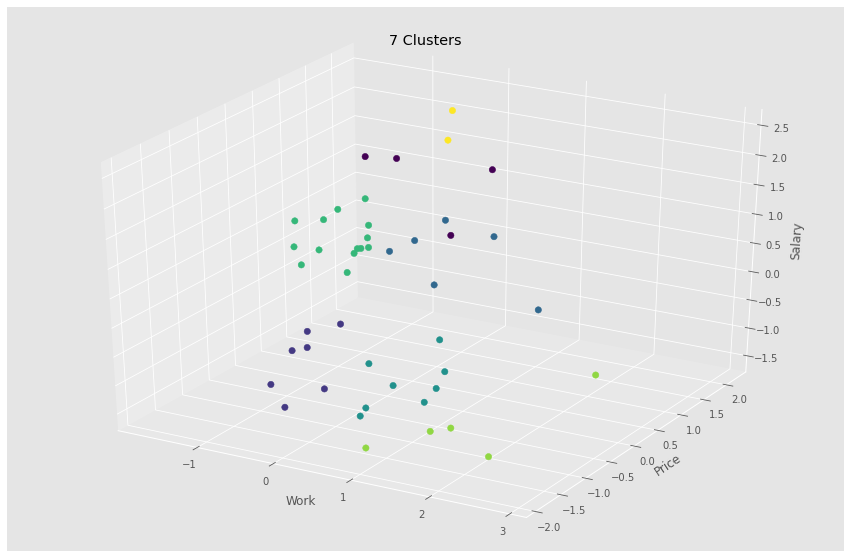

                   Work       Price     Salary
8_clusters                                    
0           1732.000000   78.135714  53.614286
1           1988.000000   56.385714  14.571429
2           2260.000000   74.050000  31.150000
3           1733.750000  113.850000  59.375000
4           1874.000000   97.950000  95.150000
5           2143.400000   40.180000   8.900000
6           1798.857143   50.942857  19.214286
7           1960.000000   75.820000  59.480000


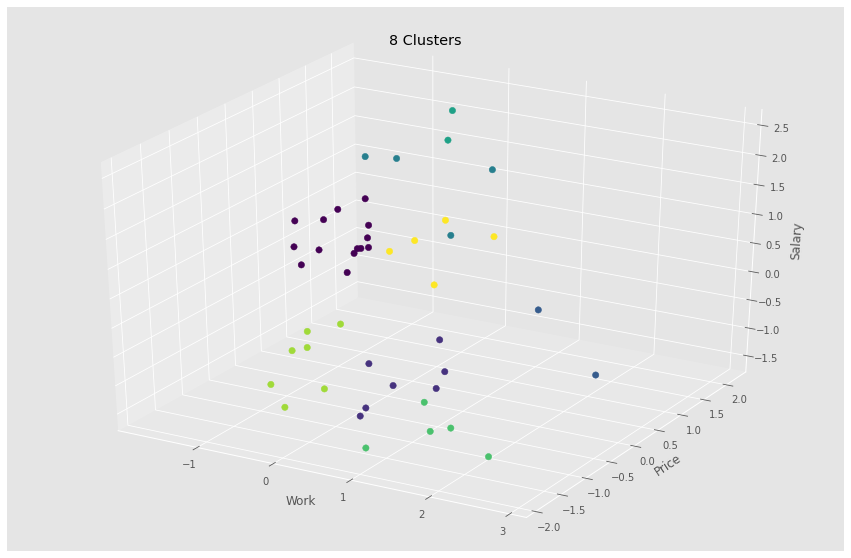

In [ ]:
for i in range(3,9):
  model = KMeans(n_clusters = i, random_state = 111, n_init = 100, max_iter = 10000)
  model.fit(standard_df)

  final_df[f'{i}_clusters'] = model.labels_

  print(final_df.groupby(f'{i}_clusters')[['Work','Price','Salary']].mean())

  threedee = plt.figure(figsize=(15,10)).gca(projection='3d')
  threedee.scatter(standard_df["Work"], standard_df["Price"], standard_df["Salary"], c = final_df[f'{i}_clusters'], alpha = 1, s =40)
  threedee.set_xlabel('Work')
  threedee.set_ylabel('Price')
  threedee.set_zlabel('Salary')
  threedee.set_title(f'{i} Clusters')
  plt.show()

По построенным моделям можно предположить, что разбиения на 3, 4, 5 кластеров являются наиболее удачными и интерпретируемыми. Более мелкое разбиение размывает четкие границы кластеров. Постараемся предложить интерпретацию для каждого из 3 вариантов.

# Оценка модели и результатов

Проведем финальную кластеризацию и интерпретируем результаты

In [ ]:
final_df.groupby('3_clusters')[['Work','Price','Salary']].mean()

,Work,Price,Salary
3_clusters,,,
0,1789.240000,84.972000,59.032000
1,1855.454545,50.781818,16.590909
2,2133.500000,54.170000,16.080000


При разбиении на три кластера, интерпретация самая простая. 
*   Нулевой кластер — это города с хорошей экономикой.
*   Первый кластер — города со средней экономикой.
*   Второй кластер — города со средней экономикой, но с большим количеством рабочих часов (условно говоря, трудоголики).

In [ ]:
final_df.groupby('4_clusters')[['Work','Price','Salary']].mean()


,Work,Price,Salary
4_clusters,,,
0,1780.500000,108.550000,71.300000
1,1855.454545,50.781818,16.590909
2,1792.000000,77.526316,55.157895
3,2133.500000,54.170000,16.080000


При разбиении на 4 кластера, становится чуть труднее. 
*   Кластер 1, по сравнению с предыдущим случаем, не изменился
*   Кластер 3 совпал с кластером 2 из предыдущего случая

А кластер 0 из предыдущего случая разбился на два новых кластера:
*   Кластер 0 — отличная экономика, не трудоголики.
*   Кластер 2 — хорошая экономика, не трудоголики.



In [ ]:
final_df.groupby('5_clusters')[['Work','Price','Salary']].mean()


,Work,Price,Salary
5_clusters,,,
0,1732.000000,78.135714,53.614286
1,1855.454545,50.781818,16.590909
2,2146.875000,48.762500,12.412500
3,1780.500000,108.550000,71.300000
4,1994.285714,75.814286,51.271429


При разбиении на 5 кластеров, становится еще сложнее. 
*   Кластер 1, по сравнению с предыдущим случаем, не изменился
*   Кластер 3 эквивалентен кластеру 0 из предыдущего случая
*   Кластер 0 — мало работают, хорошо живут
*   Кластер 2 — очень много работают, живут хуже всех
*   Кластер 4 — похож на кластер 0, но работают заметно больше



Итак, по нашему мнению, имеет смысл выделить 4 или 5 кластеров. Оба варианта, в целом, хорошо интерпретируются и подходят для дальнейшего анализа.